In [1]:
#import gc
#gc.collect()
import pandas as pd
import numpy as np
#from plotnine import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)

url_base = 'https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/'
local_path = 'C:/Users/Dimuthu/Documents/CBSL Raw Data/'
url_exports=local_path+'table2.02_20220401_e.xlsx'
url_imports=local_path+'table2.04_20220401_e.xlsx'
url_bop = local_path+'table2.10_20220331_e.xlsx'
url_remit = local_path+'table2.14.2_20220331_e.xlsx'
url_tourism = local_path+'table2.14.1_20220331_e.xlsx'

# https://www.cbsl.gov.lk/en/statistics/statistical-tables/external-sector


# Current Account

Explanation of the current account. Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum

#### Current Account (Quarterly)
<br> 
Goods and services include x,y, and z<br> 
Primary income includes x,y, and z<br> 
Secondary income includes x,y, and z<br> 

In [2]:
xls = pd.ExcelFile(url_bop)
current_account_q=pd.read_excel(url_bop, sheet_name=xls.sheet_names[0],skiprows=2)
current_account_q = current_account_q.dropna(how='all')
current_account_q['variable'] = ''

for i in range(1,current_account_q.shape[0]):
    for j in range(0,9):
        if(pd.isna(current_account_q.iloc[i,j])):
            pass
        else:
            current_account_q.variable.iloc[[i]] = current_account_q.iloc[i,j]

current_account_q.drop(columns=current_account_q.columns[:9],axis=1,inplace=True)

row_names = current_account_q.loc[0,:].values.tolist()
current_account_q = current_account_q.iloc[2:]
column_names = current_account_q.variable.to_list()
current_account_q.drop(['variable'],axis=1,inplace=True)
current_account_q[current_account_q.columns] = current_account_q[current_account_q.columns].apply(pd.to_numeric, errors='coerce')
current_account_q.fillna(0,inplace=True)

current_account_q.drop(columns=current_account_q.columns[range(0,current_account_q.shape[1],3)],axis=1,inplace=True)
current_account_q.drop(columns=current_account_q.columns[range(0,current_account_q.shape[1],2)],axis=1,inplace=True)

current_account_q = current_account_q.T
current_account_q.columns = column_names
current_account_q.columns = current_account_q.columns.str.replace('[^a-zA-Z]',"")

column_names = current_account_q.columns[current_account_q.sum()==0]
current_account_q = current_account_q.drop(columns=column_names,axis=1)

row_names = [x for x in row_names if str(x) != 'nan']
row_names = [x.replace(' ',"") for x in row_names]
row_names = [x for x in row_names if str(x) != '']
year_list = [int(x[:4]) for x in row_names]
month_list = [int(x[5:6])*3 for x in row_names]

date_list = [1]*len(month_list)

df = pd.DataFrame(list(zip(year_list, month_list,date_list)), columns =['Year', 'Month',"Day"])
df['date'] = pd.to_datetime(df[['Year','Month',"Day"]])
df.drop(columns=['Year','Month','Day'],axis=1,inplace=True)

current_account_q = pd.concat([df.reset_index(drop=True), current_account_q.reset_index(drop=True)], axis=1)

column_names = current_account_q.columns
for i in range(1,current_account_q.shape[1]):
    column_names.values[i] = column_names[i]+"_"+str(i)

current_account_q.columns = column_names

<ipython-input-2-42e99295f518>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_account_q.variable.iloc[[i]] = current_account_q.iloc[i,j]


<ipython-input-2-42e99295f518>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_account_q.drop(['variable'],axis=1,inplace=True)
<ipython-input-2-42e99295f518>:27: FutureWarning: The default value of regex will change from True to False in a future version.
  current_account_q.columns = current_account_q.columns.str.replace('[^a-zA-Z]',"")


Text(0, 0.5, 'USD millions')

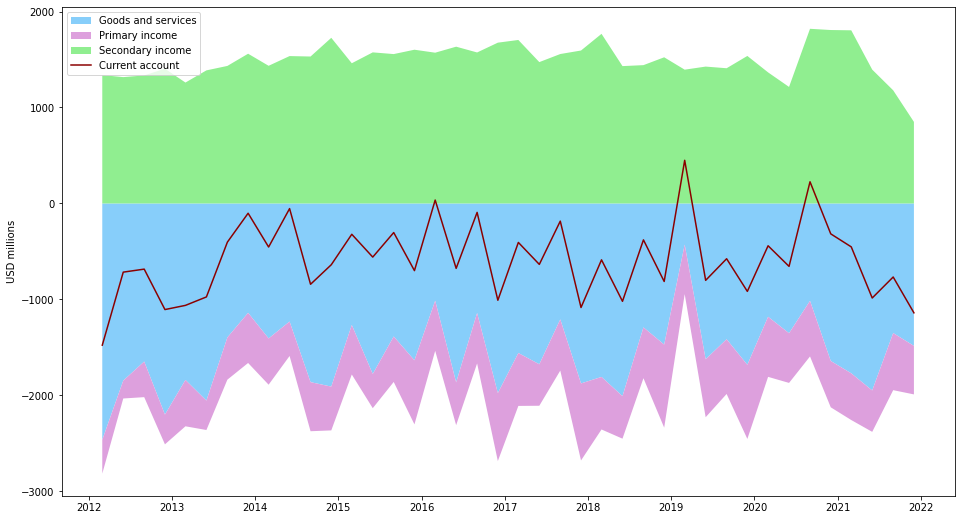

In [3]:
plt.stackplot(  current_account_q['date'],
                current_account_q['Goodsandservices_1'].astype(float),
                current_account_q['PrimaryIncome_20'].astype(float),
                labels=['Goods and services',"Primary income","Secondary income"],
                colors = ['lightskyblue','plum','lightgreen','salmon','wheat']
                )
plt.stackplot(
    current_account_q['date'],
    current_account_q['SecondaryIncome_32'].astype(float),
    labels=["Secondary income"],
    colors = ['lightgreen','salmon','wheat']
)
plt.plot(current_account_q['date'],current_account_q['CurrentAccount_37'],color="darkred",label="Current account")

plt.legend(loc='upper left')
plt.ylabel("USD millions")

Source: Central Bank - Balance of Payments (BPM5 Basis) - Quarterly (2001 to 2011) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.08.xlsx)

In [4]:

xls = pd.ExcelFile(url_exports)
exports_monthly=pd.read_excel(url_exports, sheet_name=xls.sheet_names[1],skiprows=3)
exports_monthly=exports_monthly.T
exports_monthly.columns = exports_monthly.iloc[0]
exports_monthly.drop(exports_monthly.index[0], inplace = True)
exports_monthly['date'] = pd.date_range(start="2007-01-01",periods=exports_monthly.shape[0],freq="MS")
exports_monthly = exports_monthly.dropna(axis=1, how='all')
exports_monthly.columns = exports_monthly.columns.str.replace('[^a-zA-Z]',"")

exports_monthly['otherexports'] = exports_monthly['Totalexports'] - exports_monthly['Tea'] - exports_monthly['Textilesandgarments']
exports_monthly = exports_monthly[['date','otherexports','Textilesandgarments','Tea','Totalexports']]

<ipython-input-4-d9f4718a1bb9>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  exports_monthly.columns = exports_monthly.columns.str.replace('[^a-zA-Z]',"")


In [5]:
xls = pd.ExcelFile(url_imports)
xls.sheet_names[1]

imports_monthly=pd.read_excel(url_imports, sheet_name=xls.sheet_names[1],skiprows=3)
imports_monthly=imports_monthly.T
imports_monthly.columns = imports_monthly.iloc[0]
imports_monthly.drop(imports_monthly.index[0], inplace = True)
imports_monthly['date'] = pd.date_range(start="2007-01-01",periods=imports_monthly.shape[0],freq="MS")
imports_monthly = imports_monthly.dropna(axis=1, how='all')
imports_monthly.columns = imports_monthly.columns.str.replace('[^a-zA-Z]',"")
imports_monthly['otherimports'] = imports_monthly['Totalimports'] - imports_monthly['Foodandbeverages'] -imports_monthly['Medicalandpharmaceuticals'] - imports_monthly['Fuel'] - imports_monthly['Textilesandtextilearticles'] - imports_monthly['Chemicalproducts'] - imports_monthly['Machineryandequipment'] - imports_monthly['Buildingmaterials']
imports_monthly = imports_monthly[['date','Totalimports','otherimports','Foodandbeverages','Medicalandpharmaceuticals','Fuel','Textilesandtextilearticles','Chemicalproducts','Machineryandequipment','Buildingmaterials']]
#imports_monthly.loc[:,['otherimports','Foodandbeverages','Medicalandpharmaceuticals','Fuel','Textilesandtextilearticles','Chemicalproducts','Machineryandequipment','Buildingmaterials']] = imports_monthly.loc[:,['otherimports','Foodandbeverages','Medicalandpharmaceuticals','Fuel','Textilesandtextilearticles','Chemicalproducts','Machineryandequipment','Buildingmaterials']].multiply(-1,axis="index")


<ipython-input-5-46b2dab6d36b>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  imports_monthly.columns = imports_monthly.columns.str.replace('[^a-zA-Z]',"")


In [6]:
remittances=pd.read_excel(url_remit,skiprows=3)
remittances = remittances.dropna(axis=1, how='all')
remittances = remittances[0:13]
remittances.iloc[:,0] = "month_"+remittances.iloc[:,0]
remittances = remittances.T
remittances.columns = remittances.iloc[0]
remittances.drop(remittances.index[0], inplace = True)
remittances['date'] = list(range(2009,2009+remittances.shape[0]))
remittances.drop(columns=remittances.columns[0], axis=1, inplace=True)
remittances = pd.wide_to_long(remittances, stubnames="month",i="date",j="rem",sep="_", suffix='\w+')
remittances = remittances.sort_index()
remittances = remittances.reset_index()
remittances["rem"] = pd.to_datetime(remittances.rem, format='%B', errors='coerce').dt.month
remittances = remittances.sort_values(by=['date','rem'])
remittances['date'] = pd.date_range(start="2009-01-01",periods=remittances.shape[0],freq="MS")
remittances = remittances[['date','month']]
remittances = remittances.rename(columns={"month":"remittances"})

In [7]:

tourism=pd.read_excel(url_tourism,skiprows=3)
tourism = tourism.dropna(axis=1, how='all')
tourism = tourism[0:13]
tourism.iloc[:,0] = "month_"+tourism.iloc[:,0]
tourism = tourism.T
tourism.columns = tourism.iloc[0]
tourism.drop(tourism.index[0], inplace = True)
tourism['date'] = list(range(2009,2009+tourism.shape[0]))
tourism.drop(columns=tourism.columns[0], axis=1, inplace=True)
tourism = pd.wide_to_long(tourism, stubnames="month",i="date",j="rem",sep="_", suffix='\w+')
tourism = tourism.sort_index()
tourism = tourism.reset_index()
tourism["rem"] = pd.to_datetime(tourism.rem, format='%B', errors='coerce').dt.month
tourism = tourism.sort_values(by=['date','rem'])
tourism['date'] = pd.date_range(start="2009-01-01",periods=tourism.shape[0],freq="MS")
tourism = tourism[['date','month']]
tourism = tourism.rename(columns={"month":"tourism"})

In [8]:
current_account = exports_monthly.merge(imports_monthly,left_on='date',right_on='date')
current_account = current_account.merge(remittances,left_on='date',right_on='date')
current_account = current_account.merge(tourism,left_on='date',right_on='date')

#### Current Account (Monthly Approximation)

Q: Where is IT industry?

Text(0, 0.5, 'USD millions')

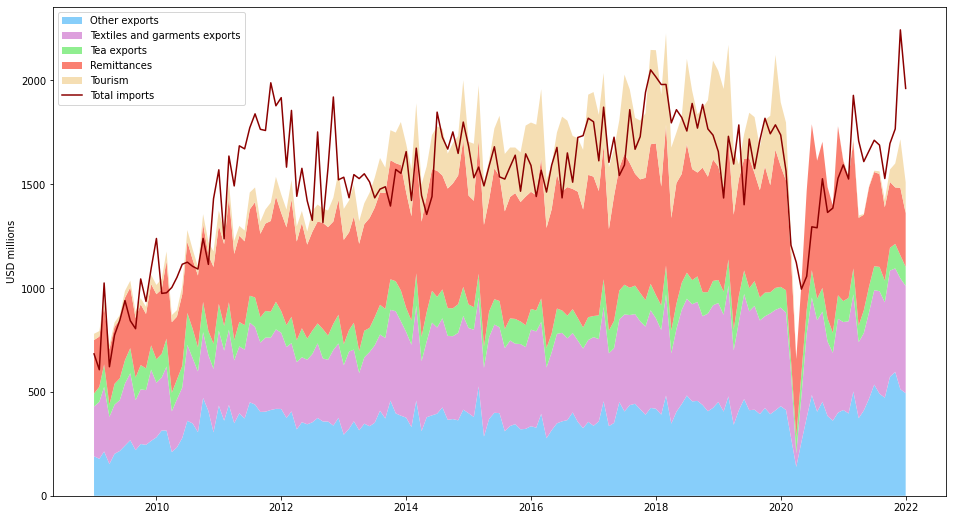

In [9]:
plt.stackplot(  current_account['date'],
                current_account['otherexports'].astype(float),
                current_account['Textilesandgarments'].astype(float),
                current_account['Tea'].astype(float),
                current_account['remittances'].astype(float),
                current_account['tourism'].astype(float),
                labels=['Other exports',"Textiles and garments exports","Tea exports","Remittances","Tourism"],
                colors = ['lightskyblue','plum','lightgreen','salmon','wheat'])
plt.plot(current_account['date'],current_account['Totalimports'],label="Total imports",color="darkred")                
plt.legend(loc='upper left')
plt.ylabel("USD millions")

Source 1: Central Bank - Exports - Monthly (2006 to Latest) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.02_20220401_e.xlsx)<br> 
Source 2: Central Bank - Imports - Monthly (2006 to Latest) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.04_20220401_e.xlsx)<br> 
Source 3: Central Bank - Workers Remittances (2009 January to Latest) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.14.2_20220331_e.xlsx)<br> 
Source 4: Central Bank - Earnings from Tourism (2009 January to Latest) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.14.1_20220331_e.xlsx)<br> 

#### Import Composition

Text(0, 0.5, 'USD millions')

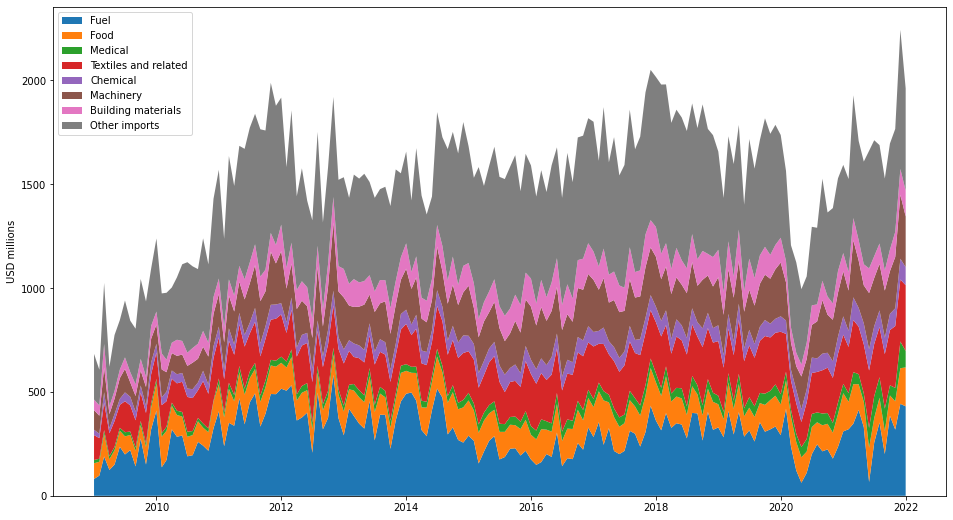

In [10]:
plt.stackplot(  current_account['date'],
                current_account['Fuel'].astype(float),
                current_account['Foodandbeverages'].astype(float),
                current_account['Medicalandpharmaceuticals'].astype(float),
                current_account['Textilesandtextilearticles'].astype(float),
                current_account['Chemicalproducts'].astype(float),
                current_account['Machineryandequipment'].astype(float),
                current_account['Buildingmaterials'].astype(float),
                current_account['otherimports'].astype(float),
                labels=['Fuel',"Food","Medical","Textiles and related","Chemical","Machinery","Building materials","Other imports"],
                )
plt.legend(loc='upper left')
plt.ylabel("USD millions")

Source: Central Bank - Imports - Monthly (2006 to Latest) [link](https://www.cbsl.gov.lk/sites/default/files/cbslweb_documents/statistics/sheets/table2.04_20220401_e.xlsx)